In [187]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm

In [188]:
#input the data file
data= pd.read_csv('University Quantitative Data.csv')


In [189]:
#Deleting the columns with textual information

In [190]:
data.head(10)

,rank/cwur_score,living_expenditure/overall,academic_requirements/gre/quant,academic_requirements/gre/verbal,academic_requirements/gpa,program/length,location/region_id,location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,ownership/id2-Private,fees/out_of_state,fees/in_state,admission_rate
0,98.25,19351,167,159,3.00,24,8,1,2,63000,42690,0.0569
1,100.00,25326,167,160,3.80,12,1,4,2,45000,38888,0.0584
2,88.72,19070,166,162,3.75,24,2,2,2,47220,47220,0.0741
3,97.12,17026,167,162,2.70,12,1,4,2,77000,77000,0.0815
4,85.83,19470,161,155,3.00,12,1,4,2,68500,68500,0.0705
5,94.12,16529,166,155,2.70,24,2,2,2,55740,55740,0.0742
6,94.12,16529,166,155,3.00,24,2,2,2,55740,55740,0.0742
7,77.60,17876,156,155,2.70,24,2,2,2,67500,35800,0.1224
8,77.60,17876,156,155,2.70,24,2,2,2,67500,35800,0.1224
9,66.14,19641,158,162,3.00,15,3,5,2,65000,55000,0.1532


In [191]:
#Describing the statistics in the data
print(data.describe())

       rank/cwur_score  living_expenditure/overall  \
count        60.000000                   60.000000   
mean         66.538333                17234.783333   
std          13.665186                 2340.070411   
min          51.740000                14374.000000   
25%          54.630000                15348.000000   
50%          63.710000                16522.500000   
75%          70.440000                18981.000000   
max         100.000000                25326.000000   

       academic_requirements/gre/quant  academic_requirements/gre/verbal  \
count                        60.000000                         60.000000   
mean                        155.933333                        152.400000   
std                           9.083169                          7.251417   
min                         130.000000                        130.000000   
25%                         151.750000                        149.000000   
50%                         158.000000                   

In [226]:
#Correlation Matrix
corr=data.corr()
corr=corr.abs()

In [227]:
test=corr[['living_expenditure/overall']]
test = test.sort('living_expenditure/overall', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,living_expenditure/overall
living_expenditure/overall,1.000000
admission_rate,0.641887
rank/cwur_score,0.556106
ownership/id2-Private,0.516551
academic_requirements/gre/quant,0.416395
fees/out_of_state,0.344277
academic_requirements/gre/verbal,0.338160
fees/in_state,0.334161
academic_requirements/gpa,0.137902
location/region_id,0.107880


In [216]:
test=corr[['academic_requirements/gre/quant']]
test = test.sort('academic_requirements/gre/quant', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,academic_requirements/gre/quant
academic_requirements/gre/quant,1.000000
academic_requirements/gre/verbal,0.835957
rank/cwur_score,0.418869
living_expenditure/overall,0.416395
ownership/id2-Private,0.218345
academic_requirements/gpa,0.191099
fees/in_state,0.119845
program/length,0.076995
fees/out_of_state,0.047445
location/region_id,-0.066345


In [217]:
test=corr[['academic_requirements/gre/verbal']]
test = test.sort('academic_requirements/gre/verbal', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,academic_requirements/gre/verbal
academic_requirements/gre/verbal,1.000000
academic_requirements/gre/quant,0.835957
living_expenditure/overall,0.338160
rank/cwur_score,0.288203
ownership/id2-Private,0.273500
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,0.236853
academic_requirements/gpa,0.236480
fees/in_state,0.058517
fees/out_of_state,0.037023
program/length,-0.010333


In [218]:
test=corr[['academic_requirements/gpa']]
test = test.sort('academic_requirements/gpa', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,academic_requirements/gpa
academic_requirements/gpa,1.000000
academic_requirements/gre/verbal,0.236480
academic_requirements/gre/quant,0.191099
living_expenditure/overall,0.137902
location/region_id,0.043354
admission_rate,0.035931
fees/in_state,-0.003781
program/length,-0.010841
fees/out_of_state,-0.035838
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,-0.048164


In [219]:
test=corr[['program/length']]
test = test.sort('program/length', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,program/length
program/length,1.000000
admission_rate,0.166540
location/region_id,0.077427
academic_requirements/gre/quant,0.076995
rank/cwur_score,0.057159
academic_requirements/gre/verbal,-0.010333
academic_requirements/gpa,-0.010841
living_expenditure/overall,-0.085821
fees/out_of_state,-0.103447
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,-0.172552


In [220]:
test=corr[['location/region_id']]
test = test.sort('location/region_id', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,location/region_id
location/region_id,1.000000
admission_rate,0.321474
program/length,0.077427
rank/cwur_score,0.054772
academic_requirements/gpa,0.043354
academic_requirements/gre/quant,-0.066345
living_expenditure/overall,-0.107880
academic_requirements/gre/verbal,-0.152987
fees/in_state,-0.158791
fees/out_of_state,-0.304729


In [221]:
test=corr[['location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5']]
test = test.sort('location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,1.000000
academic_requirements/gre/verbal,0.236853
admission_rate,0.086198
ownership/id2-Private,0.083840
living_expenditure/overall,-0.031561
academic_requirements/gpa,-0.048164
academic_requirements/gre/quant,-0.068969
fees/out_of_state,-0.126457
rank/cwur_score,-0.170084
program/length,-0.172552


In [222]:
test=corr[['ownership/id2-Private']]
test = test.sort('ownership/id2-Private', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,ownership/id2-Private
ownership/id2-Private,1.000000
fees/out_of_state,0.564056
fees/in_state,0.554593
living_expenditure/overall,0.516551
rank/cwur_score,0.316807
academic_requirements/gre/verbal,0.273500
academic_requirements/gre/quant,0.218345
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,0.083840
academic_requirements/gpa,-0.082069
program/length,-0.302722


In [223]:

test=corr[['fees/out_of_state']]
test = test.sort('fees/out_of_state', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,fees/out_of_state
fees/out_of_state,1.000000
fees/in_state,0.808305
ownership/id2-Private,0.564056
living_expenditure/overall,0.344277
rank/cwur_score,0.291199
academic_requirements/gre/quant,0.047445
academic_requirements/gre/verbal,0.037023
academic_requirements/gpa,-0.035838
program/length,-0.103447
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,-0.126457


In [224]:
test=corr[['fees/in_state']]
test = test.sort('fees/in_state', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,fees/in_state
fees/in_state,1.000000
fees/out_of_state,0.808305
ownership/id2-Private,0.554593
living_expenditure/overall,0.334161
rank/cwur_score,0.224164
academic_requirements/gre/quant,0.119845
academic_requirements/gre/verbal,0.058517
academic_requirements/gpa,-0.003781
location/region_id,-0.158791
program/length,-0.246878


In [225]:
test=corr[['admission_rate']]
test = test.sort('admission_rate', ascending=False)
test

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,admission_rate
admission_rate,1.000000
location/region_id,0.321474
program/length,0.166540
location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,0.086198
academic_requirements/gpa,0.035931
fees/out_of_state,-0.401785
academic_requirements/gre/quant,-0.438450
fees/in_state,-0.440577
academic_requirements/gre/verbal,-0.469955
rank/cwur_score,-0.535885


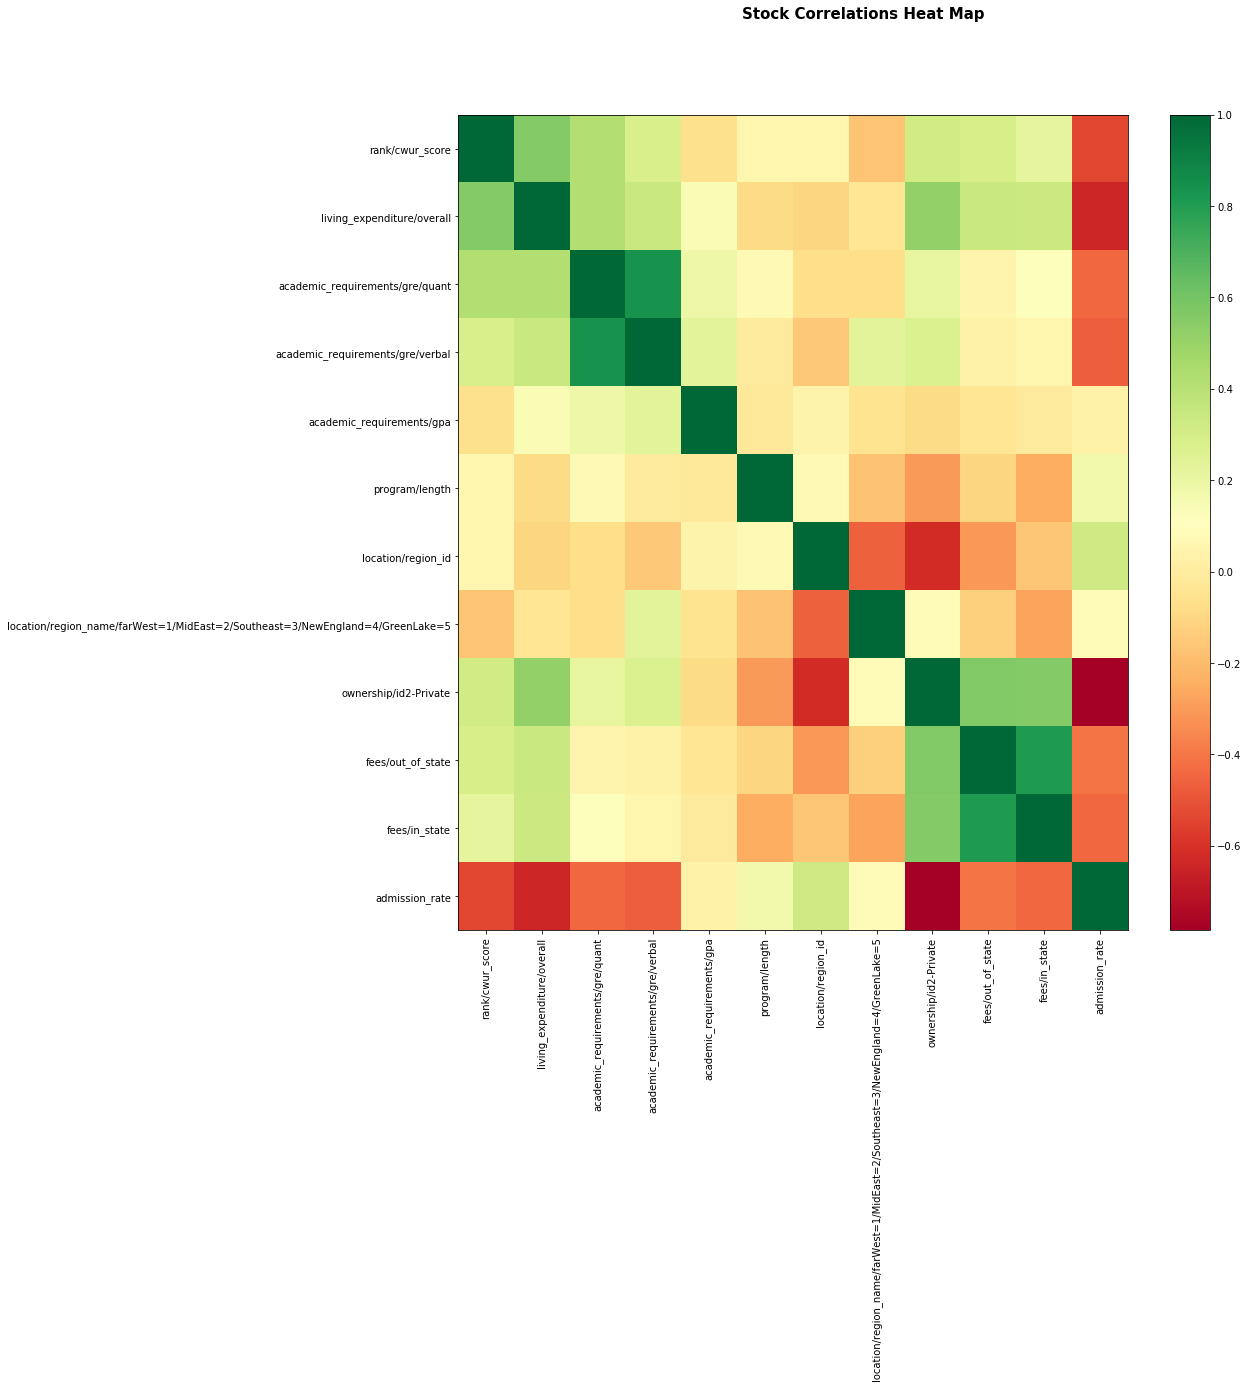

In [193]:
#Plotting these correlations
plt.figure(figsize=(15, 15))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Stock Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [194]:
def createEmptyDataframe(dataframe):
    colList=[]
    c=0
    for column in dataframe:
        colList.append(column)
        c=c+1
    df = pd.DataFrame(columns=colList)
    return df

In [195]:
def normalizeValues(dataframe):
    df=createEmptyDataframe(dataframe)
    for column in data:
        res=data[column]
        minimum=res.min()
        maximum=res.max()
        denom=maximum-minimum
        col=[]
        for value in res:
            temp=float((value-minimum))/float(((maximum)-(minimum)))
            temp=temp*100
            col.append(temp)
        df[column]=pd.Series(col)  
    return df

In [196]:
normRes=normalizeValues(data)

In [197]:
normRes

,rank/cwur_score,living_expenditure/overall,academic_requirements/gre/quant,academic_requirements/gre/verbal,academic_requirements/gpa,program/length,location/region_id,location/region_name/farWest=1/MidEast=2/Southeast=3/NewEngland=4/GreenLake=5,ownership/id2-Private,fees/out_of_state,fees/in_state,admission_rate
0,96.373809,45.443755,100.000000,90.625,27.272727,100.000000,100.000000,0.0,100.0,48.842539,34.125875,0.000000
1,100.000000,100.000000,100.000000,93.750,100.000000,20.000000,0.000000,75.0,100.0,30.749359,30.608469,0.241041
2,76.626606,42.878013,97.297297,100.000,95.454545,100.000000,14.285714,25.0,100.0,32.980851,38.316789,2.763940
3,94.032325,24.214755,100.000000,100.000,0.000000,20.000000,0.000000,75.0,100.0,62.915012,65.867649,3.953077
4,70.638210,46.530314,83.783784,78.125,27.272727,20.000000,0.000000,75.0,100.0,54.371011,58.003904,2.185441
5,87.815997,19.676771,97.297297,78.125,0.000000,100.000000,14.285714,25.0,100.0,41.544957,46.199036,2.780010
6,87.815997,19.676771,97.297297,78.125,27.272727,100.000000,14.285714,25.0,100.0,41.544957,46.199036,2.780010
7,53.584749,31.975895,70.270270,78.125,0.000000,100.000000,14.285714,25.0,100.0,53.365834,27.751617,10.525470
8,53.584749,31.975895,70.270270,78.125,0.000000,100.000000,14.285714,25.0,100.0,53.365834,27.751617,10.525470
9,29.838375,48.091673,75.675676,100.000,27.272727,40.000000,28.571429,100.0,100.0,50.852892,45.514428,15.474851


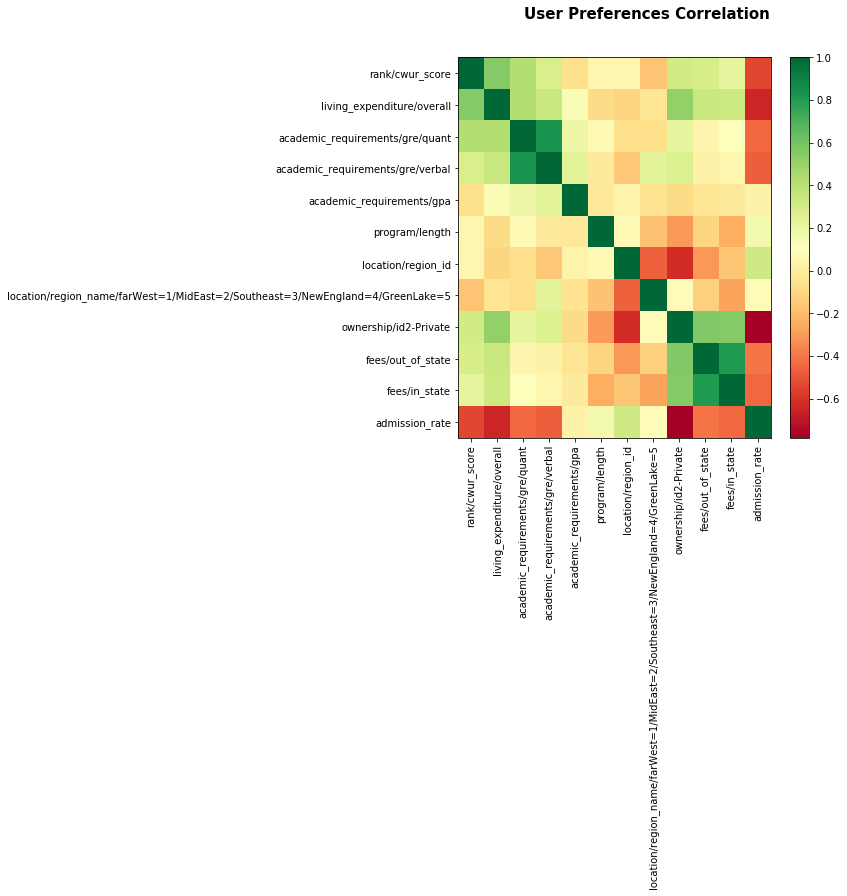

In [198]:
corr=normRes.corr()
#Plotting these correlations
plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('User Preferences Correlation', fontsize=15, fontweight='bold')
plt.show()